In [91]:
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [57]:
filename = '/content/drive/MyDrive/Colab Notebooks/Pattern Recognition/HousingData.csv'
dataset = read_csv(filename)

**Data Visualization**

In [58]:
print(dataset.shape)

(506, 14)


In [59]:
print(dataset.head(20))
set_option('display.width', 350)

        CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD  TAX  PTRATIO       B  LSTAT  MEDV
0   6.32e-03  18.0   2.31   0.0  0.54  6.58   65.2  4.09    1  296     15.3  396.90   4.98  24.0
1   2.73e-02   0.0   7.07   0.0  0.47  6.42   78.9  4.97    2  242     17.8  396.90   9.14  21.6
2   2.73e-02   0.0   7.07   0.0  0.47  7.18   61.1  4.97    2  242     17.8  392.83   4.03  34.7
3   3.24e-02   0.0   2.18   0.0  0.46  7.00   45.8  6.06    3  222     18.7  394.63   2.94  33.4
4   6.91e-02   0.0   2.18   0.0  0.46  7.15   54.2  6.06    3  222     18.7  396.90    NaN  36.2
5   2.99e-02   0.0   2.18   0.0  0.46  6.43   58.7  6.06    3  222     18.7  394.12   5.21  28.7
6   8.83e-02  12.5   7.87   NaN  0.52  6.01   66.6  5.56    5  311     15.2  395.60  12.43  22.9
7   1.45e-01  12.5   7.87   0.0  0.52  6.17   96.1  5.95    5  311     15.2  396.90  19.15  27.1
8   2.11e-01  12.5   7.87   0.0  0.52  5.63  100.0  6.08    5  311     15.2  386.63  29.93  16.5
9   1.70e-01  12.5   7.87   Na

In [60]:
print(dataset.describe())

           CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX  PTRATIO       B   LSTAT    MEDV
count  4.86e+02  486.00  486.00  486.00  506.00  506.00  486.00  506.00  506.00  506.00   506.00  506.00  486.00  506.00
mean   3.61e+00   11.21   11.08    0.07    0.55    6.28   68.52    3.80    9.55  408.24    18.46  356.67   12.72   22.53
std    8.72e+00   23.39    6.84    0.26    0.12    0.70   28.00    2.11    8.71  168.54     2.16   91.29    7.16    9.20
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13    1.00  187.00    12.60    0.32    1.73    5.00
25%    8.19e-02    0.00    5.19    0.00    0.45    5.89   45.17    2.10    4.00  279.00    17.40  375.38    7.12   17.02
50%    2.54e-01    0.00    9.69    0.00    0.54    6.21   76.80    3.21    5.00  330.00    19.05  391.44   11.43   21.20
75%    3.56e+00   12.50   18.10    0.00    0.62    6.62   93.97    5.19   24.00  666.00    20.20  396.23   16.96   25.00
max    8.90e+01  100.00   27.74 

In [61]:
print ( dataset.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


**Data Preprocessing**

In [70]:
dataset1=dataset.dropna()


In [71]:
dataset1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1,296,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2,242,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2,242,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3,222,18.7,394.63,2.94,33.4
5,2.99e-02,0.0,2.18,0.0,0.46,6.43,58.7,6.06,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1.78e-01,0.0,9.69,0.0,0.58,5.57,73.5,2.40,6,391,19.2,395.77,15.10,17.5
500,2.24e-01,0.0,9.69,0.0,0.58,6.03,79.7,2.50,6,391,19.2,396.90,14.33,16.8
502,4.53e-02,0.0,11.93,0.0,0.57,6.12,76.7,2.29,1,273,21.0,396.90,9.08,20.6
503,6.08e-02,0.0,11.93,0.0,0.57,6.98,91.0,2.17,1,273,21.0,396.90,5.64,23.9


In [72]:
print ( dataset1.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


**CO-relation**

In [63]:
set_option('display.width', 150)
set_option('display.precision', 2)
correlations = dataset.corr(method='pearson')
print(correlations)

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.19   0.40 -5.44e-02  0.42 -0.22  0.35 -0.37  6.25e-01  0.58     0.28 -0.38   0.44 -0.39
ZN      -0.19  1.00  -0.53 -3.72e-02 -0.51  0.32 -0.56  0.66 -3.11e-01 -0.31    -0.41  0.17  -0.41  0.37
INDUS    0.40 -0.53   1.00  5.99e-02  0.76 -0.39  0.64 -0.71  6.05e-01  0.73     0.39 -0.36   0.59 -0.48
CHAS    -0.05 -0.04   0.06  1.00e+00  0.08  0.10  0.08 -0.09  1.47e-03 -0.03    -0.11  0.05  -0.05  0.18
NOX      0.42 -0.51   0.76  7.51e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   0.58 -0.43
RM      -0.22  0.32  -0.39  1.05e-01 -0.30  1.00 -0.25  0.21 -2.10e-01 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.56   0.64  7.88e-02  0.73 -0.25  1.00 -0.74  4.58e-01  0.51     0.27 -0.28   0.60 -0.39
DIS     -0.37  0.66  -0.71 -9.40e-02 -0.77  0.21 -0.74  1.00 -4.95e-01 -0.53    -0.23  0.29  -0.49  0.25
RAD      0.62 -0.31   0.60  1.47e-03  0.61 -0.21  0.46 

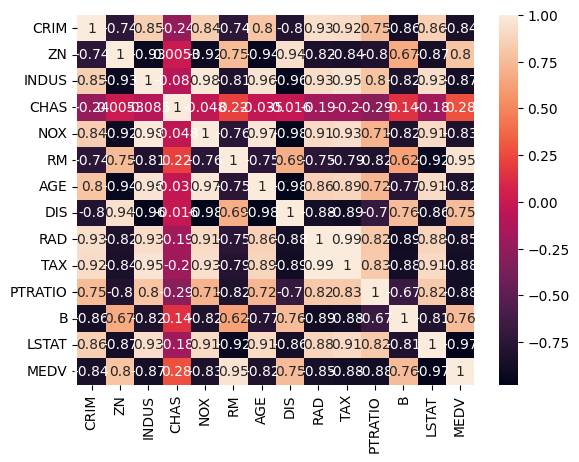

<Figure size 10000x10000 with 0 Axes>

In [45]:
# Create a correlation matrix
corr = correlations.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)
plt.figure(figsize=(100,100))
plt.show()

**Train Test Split**

In [73]:
x=dataset1.drop("MEDV",axis=1)
y=dataset1[("MEDV")]

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.3 , random_state=42)

**Creating a linear regression model**

In [101]:
model = LinearRegression()

**Training the model**

In [102]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the test set

In [103]:
y_pred = model.predict(x_test)

**Evaluating the model**

In [106]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
n = len(y_test)
k = x_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [107]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 28.870771928253568
R-squared: 0.6905175764205982
Mean Absolute Error (MAE): 3.455821007248004
Root Mean Squared Error (RMSE): 5.373152885248434
Adjusted R-squared: 0.6522007049298151
